In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import joblib
import pickle

In [13]:
df = pd.read_csv('preprocessed_student2.csv')

In [14]:
features =['Hours Studied', 'Previous Scores']
target = 'Performance Index'

In [15]:
df = df[features + [target]].dropna()

In [16]:
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# Step 5: Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [18]:
y_pred = rf_model.predict(X_test)

In [ ]:
# Assuming you have actual and predicted values
# y_test = actual target values
# y_pred = predicted target values from the model

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

Mean Absolute Error (MAE): 2.1225
Mean Squared Error (MSE): 7.2995
Root Mean Squared Error (RMSE): 2.7018
R² Score: 0.9803


In [20]:
# Step 7: Save the model in Pickle format
with open('rf_model2.pkl', 'wb') as pkl_file:
    pickle.dump(rf_model, pkl_file)
print("Model saved as rf_model.pkl")

Model saved as rf_model.pkl


In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 📊 Function to evaluate and return metrics
def evaluate_regression_model(model, X, y, dataset_name=""):
    y_pred = model.predict(X)

    mae = mean_absolute_error(y, y_pred)
    mse = mean_squared_error(y, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y, y_pred)

    return {
        "Dataset": dataset_name,
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse,
        "R² Score": r2
    }

# 🔍 Evaluate both datasets
train_metrics = evaluate_regression_model(rf_model, X_train, y_train, "Training")
test_metrics = evaluate_regression_model(rf_model, X_test, y_test, "Testing")

# 📋 Combine metrics into a DataFrame
metrics_df = pd.DataFrame([train_metrics, test_metrics]).set_index("Dataset")
print("\n📊 Regression Metrics Comparison:")
print(metrics_df.round(4))


📊 Regression Metrics Comparison:
             MAE     MSE    RMSE  R² Score
Dataset                                   
Training  1.8928  6.7660  2.6012    0.9816
Testing   2.1225  7.2995  2.7018    0.9803


C:\Users\NikitaRampurkarV-Sof\AppData\Local\Temp\ipykernel_13864\478360125.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df, x='Importance (%)', y='Feature', palette='viridis')


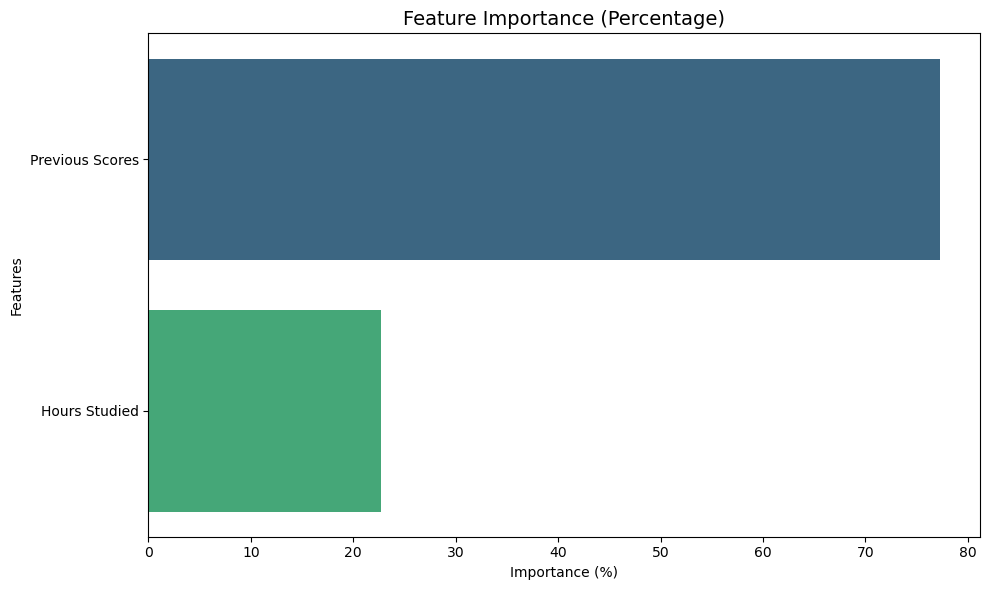

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances and convert to percentages
importances = rf_model.feature_importances_
feature_names = X_train.columns
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance (%)': importances * 100  # Convert to percentage
}).sort_values(by='Importance (%)', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df, x='Importance (%)', y='Feature', palette='viridis')
plt.title('Feature Importance (Percentage)', fontsize=14)
plt.xlabel('Importance (%)')
plt.ylabel('Features')
plt.tight_layout()
plt.show()
